In [ ]:

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Workspace /Kannada-MNIST/Dig-MNIST.csv")
data.shape

(10240, 785)

In [ ]:
labels = data['label']

In [ ]:
# some parameters
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 128
learning_rate = 0.001

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
pixels= data.drop('label',axis =1)

In [ ]:
labels

0        0
1        1
2        2
3        3
4        4
        ..
10235    5
10236    6
10237    7
10238    8
10239    9
Name: label, Length: 10240, dtype: int64

In [ ]:
pixels

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, labels, pixels, transform=None, target_transform=None):
        self.labels =labels
        self.pixels = pixels
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        pixel_val = self.pixels[idx].astype(float)
        label_val = self.labels[idx]
        if self.transform:
            pixel_val = self.transform(pixel_val)
        if self.target_transform:
            label_val = self.target_transform(label_val)
        return pixel_val , label_val



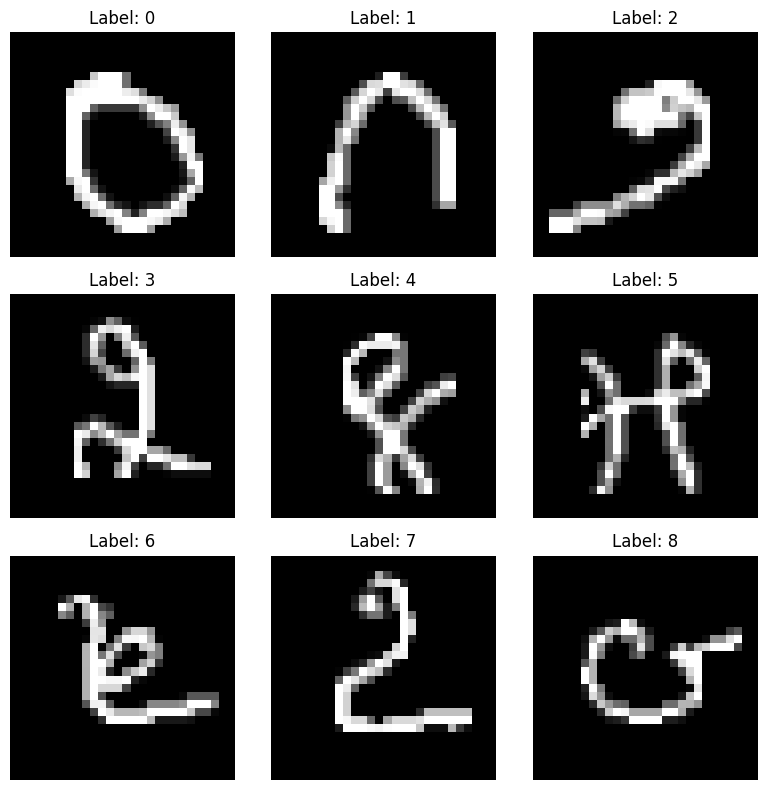

In [ ]:
Data = CustomImageDataset(labels.values, pixels.values)
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for idx in range(9):
    pixel_values, label = Data[idx]
    image = pixel_values.reshape(28, 28)

    row_idx = idx // 3
    col_idx = idx % 3
    axes[row_idx, col_idx].imshow(image, cmap='gray')
    axes[row_idx, col_idx].set_title(f"Label: {label}")
    axes[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show()

## Applying PCA

In [ ]:
import numpy as np

data_matrix = pixels.astype(float)

# Calculate the covariance matrix
covariance_matrix = np.cov(data_matrix, rowvar=False)

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Print the eigenvalues
print("Eigenvalues:")
print(eigenvalues)


Eigenvalues:
[ 2.55393898e+05+0.00000000e+00j  1.67144308e+05+0.00000000e+00j
  1.38038361e+05+0.00000000e+00j  1.12101044e+05+0.00000000e+00j
  9.83432564e+04+0.00000000e+00j  8.95386100e+04+0.00000000e+00j
  8.04501338e+04+0.00000000e+00j  7.26664600e+04+0.00000000e+00j
  6.88410950e+04+0.00000000e+00j  6.63208030e+04+0.00000000e+00j
  6.11019064e+04+0.00000000e+00j  5.70488661e+04+0.00000000e+00j
  5.37606821e+04+0.00000000e+00j  5.17724953e+04+0.00000000e+00j
  4.77690162e+04+0.00000000e+00j  4.38146081e+04+0.00000000e+00j
  4.26837105e+04+0.00000000e+00j  4.14219918e+04+0.00000000e+00j
  3.71354405e+04+0.00000000e+00j  3.61681750e+04+0.00000000e+00j
  3.44384646e+04+0.00000000e+00j  3.34031203e+04+0.00000000e+00j
  3.21771854e+04+0.00000000e+00j  3.16236138e+04+0.00000000e+00j
  3.04571889e+04+0.00000000e+00j  2.94771575e+04+0.00000000e+00j
  2.89306521e+04+0.00000000e+00j  2.82788544e+04+0.00000000e+00j
  2.64911624e+04+0.00000000e+00j  2.54381133e+04+0.00000000e+00j
  2.45633260

In [ ]:
type(eigenvalues)

numpy.ndarray

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


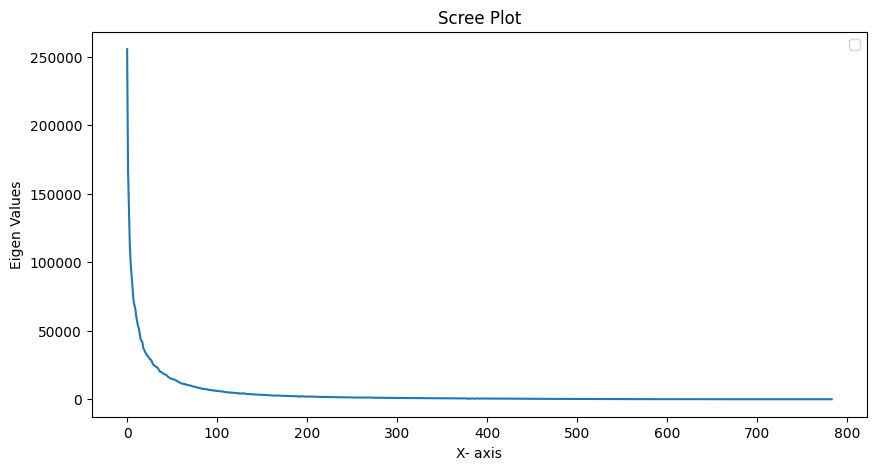

In [ ]:
# sortedeig=eigenvalues.sort()
plt.figure(figsize=(10, 5))
plt.plot(range(0, eigenvalues.shape[0]),  eigenvalues)

plt.xlabel('X- axis')
plt.ylabel('Eigen Values')
plt.title('Scree Plot')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler           # Imported the Libraries

print(pixels.shape[0])


# scaler = StandardScaler()

X=pixels

n_components = 100
pca = PCA(n_components=n_components)                               # initializing the PCA object

X_pca = pca.fit_transform(X)                                          # Transforming the X and extracting the Principal Components

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

principal_components = pca.components_
print("Principal Components:", principal_components)                    # Printing the Principal Components

principal_components.shape[0]


10240
Explained Variance Ratio: [0.07556024 0.04945092 0.04083971 0.03316595 0.02909561 0.02649068
 0.02380179 0.02149893 0.02036717 0.01962152 0.01807747 0.01687834
 0.01590551 0.01531729 0.01413283 0.01296289 0.0126283  0.01225501
 0.0109868  0.01070063 0.01018888 0.00988257 0.00951987 0.00935609
 0.00901099 0.00872104 0.00855935 0.00836651 0.00783761 0.00752606
 0.00726724 0.00719596 0.00703133 0.0069182  0.00675898 0.00645252
 0.00610836 0.00589396 0.00588087 0.00571395 0.00558686 0.00541407
 0.00535714 0.00531373 0.00514551 0.00494506 0.00474187 0.00465032
 0.00454555 0.00443352 0.00436664 0.00429183 0.00426973 0.00419761
 0.00407578 0.00399741 0.00385114 0.00376138 0.00362215 0.0035627
 0.00342305 0.00338878 0.0033444  0.00328664 0.00327753 0.00320914
 0.00311621 0.00306084 0.00303315 0.00299914 0.00296738 0.00289693
 0.00280932 0.00276011 0.00273359 0.00271005 0.00261208 0.002566
 0.00252548 0.00248979 0.00245979 0.00237181 0.00229799 0.00227976
 0.00223013 0.00218904 0.00217175

100

In [ ]:

# X_pca = pca.fit_transform(X)

X_reconstructed = pca.inverse_transform(X_pca)                # Applying the Reverse PCA



print(X_reconstructed.shape[0])            # printing the total no of data points

10240


In [ ]:
type(X_reconstructed)

numpy.ndarray

In [ ]:

# import numpy as np
# X = torch.from_numpy(X_reconstructed)
# print(type(X))

In [ ]:
# X.shape[1]

In [ ]:
df = pd.DataFrame(X_reconstructed)

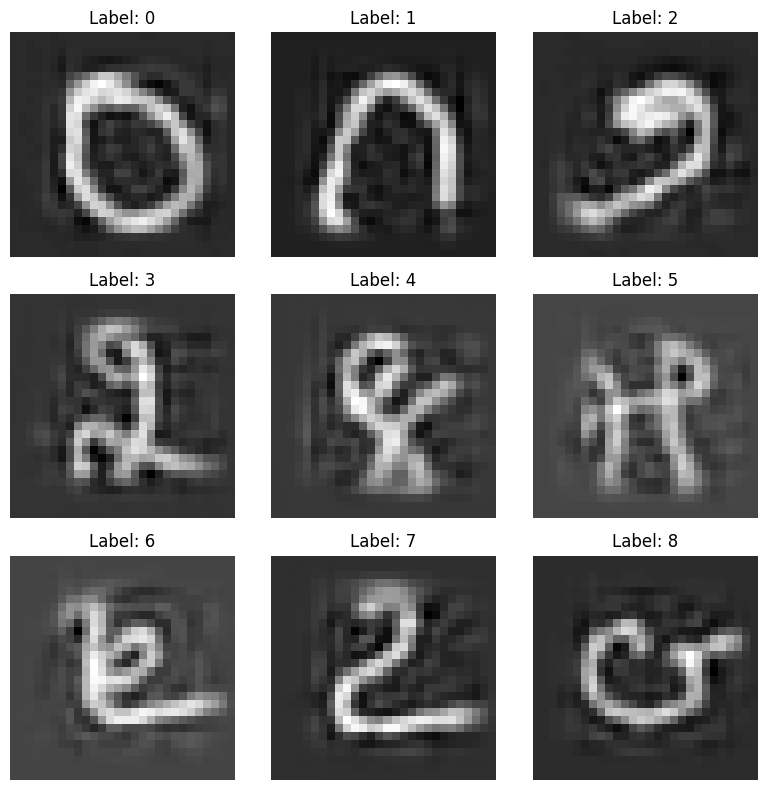

In [ ]:
Data = CustomImageDataset(labels.values, df.values)
fig, axes = plt.subplots(3, 3, figsize=(8, 8))                      # Printing the images which are from Reverse PCA

for idx in range(9):
    pixel_values, label = Data[idx]
    image = pixel_values.reshape(28, 28)

    row_idx = idx // 3
    col_idx = idx % 3
    axes[row_idx, col_idx].imshow(image, cmap='gray')
    axes[row_idx, col_idx].set_title(f"Label: {label}")
    axes[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show()

## Applying the Auto encoding and Decoding to the KMINST data set

In [ ]:
Data = CustomImageDataset(labels.values, pixels.values)

In [ ]:
Data.pixels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Initializing and Training The Autoencoder Model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np


class Autoencoder(nn.Module):
    def __init__(self, input_size, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, input_size),
            nn.ReLU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

input_size = 784  # 28x28 images
encoding_dim = 32   # 32 bit encoding
batch_size=64      # batch size 64


model = Autoencoder(input_size, encoding_dim)    # Auto Encoder Model

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)   # Defining the loss function and optimizer

Data = CustomImageDataset(labels.values, pixels.values)

# dataloader = DataLoader(Data, batch_size=batch_size, shuffle=True)







In [ ]:
from torch.utils.data import DataLoader, Subset


train_size = int(0.7 * len(Data))
val_size = int(0.1 * len(Data))
test_size = len(Data) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(Data, [train_size, val_size, test_size])

batch_size = 64



In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)             # batch size is 64   TRAIN VALIDATION TEST
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
# Training loop
import matplotlib.pyplot as plt

train_losses = []
val_losses = []

num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0.0

    model.train()
    for data in train_dataloader:
        inputs, _ = data
        optimizer.zero_grad()
        inputs = inputs.to(torch.float32)
        outputs = model(inputs)

        # outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()


    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        for data in val_dataloader:
            inputs, _ = data
            inputs = inputs.to(torch.float32)
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            val_loss += loss.item()
    train_losses.append(train_loss/len(train_dataloader))
    val_losses.append(val_loss/len(val_dataloader))

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss/len(train_dataloader):.4f}, "
          f"Validation Loss: {val_loss/len(val_dataloader):.4f}")

# Test phase
model.eval()
test_loss = 0.0
with torch.no_grad():
    for data in test_dataloader:
        inputs, _ = data
        inputs = inputs.to(torch.float32)
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        test_loss += loss.item()

print(f"Test Loss: {test_loss/len(test_dataloader):.4f}")


Epoch [1/10], Train Loss: 4149.6919, Validation Loss: 3303.4294
Epoch [2/10], Train Loss: 2906.8247, Validation Loss: 2597.4863
Epoch [3/10], Train Loss: 2433.9273, Validation Loss: 2313.1870
Epoch [4/10], Train Loss: 2217.0120, Validation Loss: 2163.1215
Epoch [5/10], Train Loss: 2079.2315, Validation Loss: 2051.5749
Epoch [6/10], Train Loss: 1968.4490, Validation Loss: 1952.5363
Epoch [7/10], Train Loss: 1883.7940, Validation Loss: 1897.7652
Epoch [8/10], Train Loss: 1834.1159, Validation Loss: 1860.2964
Epoch [9/10], Train Loss: 1798.8492, Validation Loss: 1833.3627
Epoch [10/10], Train Loss: 1772.2957, Validation Loss: 1810.0352
Test Loss: 1815.4749


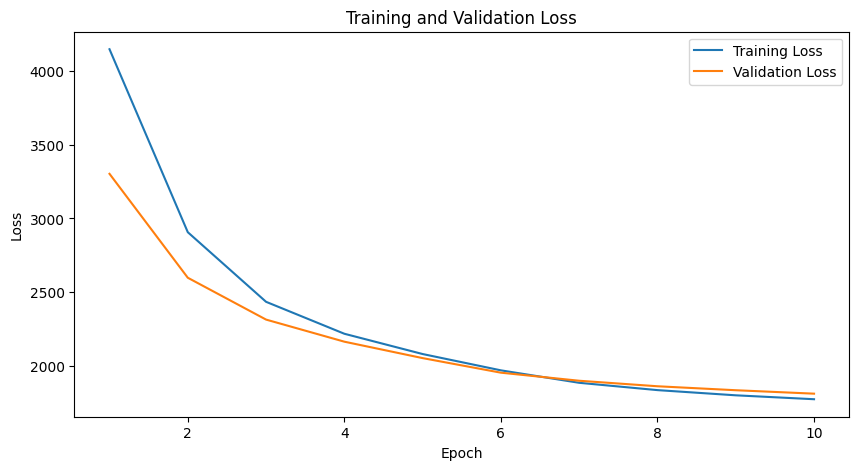

In [ ]:


# Plotting the losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


### Applying the Encoder on the data for checking

In [ ]:
model.eval()

# Pass your input data through the encoder layers
with torch.no_grad():
    encoded_data = model.encoder(batch_data)


In [ ]:
encoded_data.shape[0]

64

In [ ]:
encoded_data.shape[1]      #### encoded into 32 feature data

32

### Applying the Encoder on Entire Data and converting it to 32 Features

In [ ]:
import torch
import pandas as pd
from torch.utils.data import DataLoader


model.eval()

# Create a DataLoader for your dataset
dataloader = DataLoader(Data, batch_size=batch_size, shuffle=False)

# Initialize a list to store encoded representations
encoded_data_list = []

# Iterate through batches and encode data
with torch.no_grad():
    for batch_data, _ in dataloader:
        # Flatten the batch_data if needed
        # batch_data = batch_data.view(batch_data.size(0), -1)
        batch_data = batch_data.to(torch.float32)
        # Pass batch_data through the encoder
        encoded_data =model.encoder(batch_data)

        # Append encoded data to the list
        encoded_data_list.append(encoded_data.numpy())

encoded_data_array = np.concatenate(encoded_data_list, axis=0)


encoded_df = pd.DataFrame(encoded_data_array)

print(encoded_df)


               0           1            2           3           4   \
0      543.918762  553.335999  1114.679199  607.959961  251.163101   
1      602.610718  385.379303   790.232788  283.431885  572.083435   
2      440.127350  311.148621   577.130066  197.982925  653.580994   
3       86.506058  141.922409   399.690338  518.487061  137.450043   
4      143.025604  351.065918   619.343018  535.214172  245.658600   
...           ...         ...          ...         ...         ...   
10235  615.491211  774.573364    97.325516  367.446716  570.533752   
10236  373.601807  345.423889   212.364990  253.039154    0.000000   
10237  336.296265  458.081665   618.912781  659.998108   82.693954   
10238  246.627441   46.593410   204.969482  327.205688  142.149063   
10239  402.655945  319.027588   225.692993  242.905136   44.592056   

               5           6           7           8           9   ...  \
0      518.922180  591.405212   99.429321  648.962952  658.533569  ...   
1      623.

### Decoding the Entire Data again to 784 features

In [ ]:

model.eval()


decoded_data_list = []

for index, row in encoded_df.iterrows():
    # Convert the row to a PyTorch tensor
    encoded_data = torch.tensor(row.values, dtype=torch.float32)


    decoded_data =model.decoder(encoded_data)

    decoded_data_list.append(decoded_data.detach().numpy())

# Convert the list of decoded data to a NumPy array
decoded_data_array = np.array(decoded_data_list)
decoded_df = pd.DataFrame(decoded_data_array)



### now printing the images from Autoencoder Data

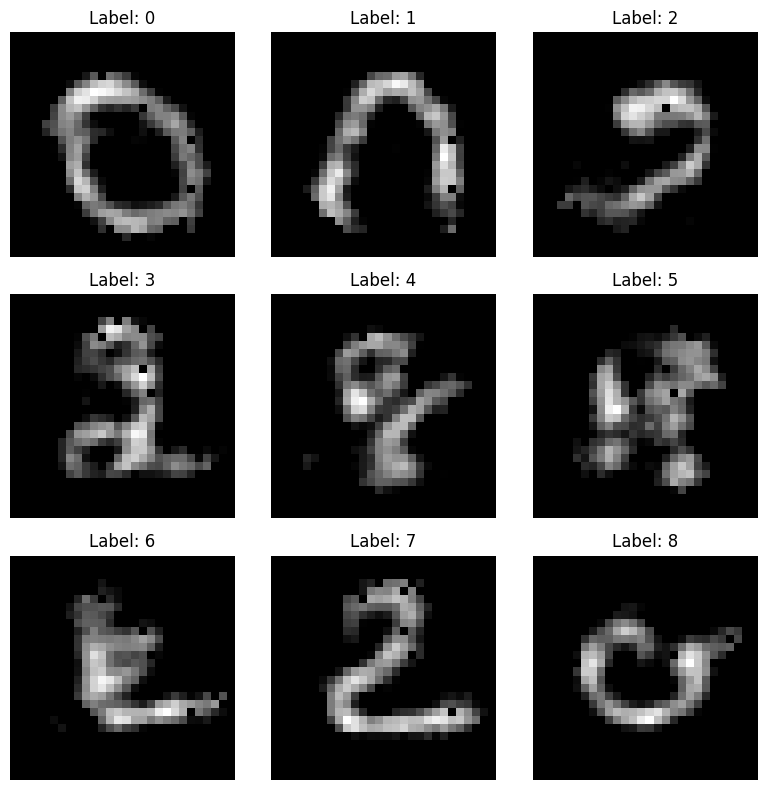

In [ ]:
Data = CustomImageDataset(labels.values, decoded_df.values)
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for idx in range(9):
    pixel_values, label = Data[idx]
    image = pixel_values.reshape(28, 28)

    row_idx = idx // 3
    col_idx = idx % 3
    axes[row_idx, col_idx].imshow(image, cmap='gray')
    axes[row_idx, col_idx].set_title(f"Label: {label}")
    axes[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show()